In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("consumptions.csv", delimiter=';', index_col=0)
df

,Fecha,Hora,Consumo_KWh,Metodo_obtencion
CUPS,,,,
ESXXXXXXXXXXXXXXXXXXXX,15/02/2023,1,"0,081",R
ESXXXXXXXXXXXXXXXXXXXX,15/02/2023,2,"0,039",R
ESXXXXXXXXXXXXXXXXXXXX,15/02/2023,3,"0,049",R
ESXXXXXXXXXXXXXXXXXXXX,15/02/2023,4,"0,038",R
ESXXXXXXXXXXXXXXXXXXXX,15/02/2023,5,"0,035",R
ESXXXXXXXXXXXXXXXXXXXX,15/02/2023,6,"0,053",R
ESXXXXXXXXXXXXXXXXXXXX,15/02/2023,7,"0,039",R
ESXXXXXXXXXXXXXXXXXXXX,15/02/2023,8,"0,095",R
ESXXXXXXXXXXXXXXXXXXXX,15/02/2023,9,"0,123",R


In [14]:
import csv
from datetime import datetime, timedelta
import random

df = pd.read_csv("dataset_365dias.csv", delimiter=';')
df

,CUPS,Fecha,Hora,Consumo_KWh,Metodo_obtencion
0,ESXXXXXXXXXXXXXXXXXXXX,01/01/2023,1,0.462,R
1,ESXXXXXXXXXXXXXXXXXXXX,01/01/2023,2,0.213,R
2,ESXXXXXXXXXXXXXXXXXXXX,01/01/2023,3,0.353,R
3,ESXXXXXXXXXXXXXXXXXXXX,01/01/2023,4,0.119,R
4,ESXXXXXXXXXXXXXXXXXXXX,01/01/2023,5,0.263,R
...,...,...,...,...,...
8755,ESXXXXXXXXXXXXXXXXXXXX,31/12/2023,20,0.262,R
8756,ESXXXXXXXXXXXXXXXXXXXX,31/12/2023,21,0.370,R
8757,ESXXXXXXXXXXXXXXXXXXXX,31/12/2023,22,0.475,R
8758,ESXXXXXXXXXXXXXXXXXXXX,31/12/2023,23,0.452,R


In [35]:
from datetime import datetime

from datetime import datetime
import pandas as pd


def consumptions_csv_to_df(path: str = "dataset_365dias.csv") -> pd.DataFrame:
    consumptions = pd.read_csv(path, delimiter=";")

    # Crear campo de fecha y hora
    consumptions["Fecha_Hora"] = pd.to_datetime(
        consumptions["Fecha"] + " " + (consumptions["Hora"] - 1).astype(str) + ":00:00",
        format="%d/%m/%Y %H:%M:%S",
    )

    # Eliminar campos de fecha y hora
    consumptions = consumptions.drop(columns=["Fecha", "Hora"])

    return consumptions


def consumptions_csv_to_dict(path: str = "dataset_365dias.csv") -> dict:

    consumptions = {}

    with open(path, "r") as f:
        data = f.readlines()

    for line in data[1:]:
        cups, fecha, hora, kWh, metodo = line.strip().split(";")

        fecha = fecha.split("/")[::-1]

        fechahora = datetime.strptime(
            f"{fecha[0]}-{fecha[1]}-{fecha[2]} {int(hora)-1}:00:00", "%Y-%m-%d %H:%M:%S"
        )

        consumptions[fechahora.timestamp()] = float(kWh.replace(",", "."))

    return consumptions

df = consumptions_csv_to_df()
print(df)
consumptions = consumptions_csv_to_dict()

                        CUPS  Consumo_KWh Metodo_obtencion          Fecha_Hora
0     ESXXXXXXXXXXXXXXXXXXXX        0.462                R 2023-01-01 00:00:00
1     ESXXXXXXXXXXXXXXXXXXXX        0.213                R 2023-01-01 01:00:00
2     ESXXXXXXXXXXXXXXXXXXXX        0.353                R 2023-01-01 02:00:00
3     ESXXXXXXXXXXXXXXXXXXXX        0.119                R 2023-01-01 03:00:00
4     ESXXXXXXXXXXXXXXXXXXXX        0.263                R 2023-01-01 04:00:00
...                      ...          ...              ...                 ...
8755  ESXXXXXXXXXXXXXXXXXXXX        0.262                R 2023-12-31 19:00:00
8756  ESXXXXXXXXXXXXXXXXXXXX        0.370                R 2023-12-31 20:00:00
8757  ESXXXXXXXXXXXXXXXXXXXX        0.475                R 2023-12-31 21:00:00
8758  ESXXXXXXXXXXXXXXXXXXXX        0.452                R 2023-12-31 22:00:00
8759  ESXXXXXXXXXXXXXXXXXXXX        0.404                R 2023-12-31 23:00:00

[8760 rows x 4 columns]


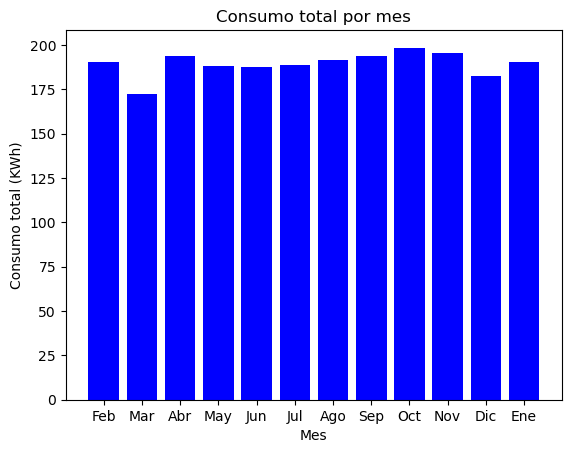

In [36]:
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

# Crear un diccionario para almacenar el consumo total por mes
consumo_por_mes = defaultdict(float)

# Calcular el consumo total por mes
for timestamp, consumo in consumptions.items():
    fecha = datetime.utcfromtimestamp(timestamp)
    mes = fecha.month
    consumo_por_mes[mes] += consumo

# Convertir el diccionario a listas para plotear
meses = list(consumo_por_mes.keys())
consumo_total = list(consumo_por_mes.values())

# Crear el gráfico
plt.bar(meses, consumo_total, color='blue')
plt.xlabel('Mes')
plt.ylabel('Consumo total (KWh)')
plt.title('Consumo total por mes')
plt.xticks(meses, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.show()


In [71]:
import pandas as pd
import plotly.express as px

# Selecciona el día específico "2023-01-01"
dia_seleccionado = pd.to_datetime("2023-01-01")

# Filtrar el DataFrame para el día seleccionado
df_dia = df[df['Fecha_Hora'].dt.date == dia_seleccionado.date()]

# Crear el gráfico de barras para el consumo por horas
fig = px.bar(df_dia, x='Fecha_Hora', y='Consumo_KWh', labels={'Fecha_Hora': 'Hora del día', 'Consumo_KWh': 'Consumo (KWh)'},
             title=f'Consumo por horas - {dia_seleccionado}')

# Mostrar el gráfico
fig.show()

c:\Users\Usuario\anaconda3\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [72]:

############################################ NO BUENO ############################################


import pandas as pd

# Calcular el consumo total por mes
consumo_por_mes = df.groupby(df['Fecha_Hora'].dt.to_period("M"))['Consumo_KWh'].sum().reset_index()

# Seleccionar los meses con mayor consumo (por ejemplo, los 3 meses con mayor consumo)
meses_mayor_consumo = consumo_por_mes.nlargest(3, 'Consumo_KWh')['Fecha_Hora']

# Filtrar el DataFrame para los días con mayor consumo en esos meses
df_mayor_consumo_mes = df[df['Fecha_Hora'].dt.to_period("M").isin(meses_mayor_consumo)]

# Calcular el consumo total por día en esos meses
consumo_por_dia = df_mayor_consumo_mes.groupby(df_mayor_consumo_mes['Fecha_Hora'].dt.date)['Consumo_KWh'].sum().reset_index()

# Seleccionar los días con mayor consumo (por ejemplo, los 5 días con mayor consumo)
dias_mayor_consumo = consumo_por_dia.nlargest(5, 'Consumo_KWh')['Fecha_Hora']

# Filtrar el DataFrame para las horas de mayor consumo en esos días
df_mayor_consumo_dia = df_mayor_consumo_mes[df_mayor_consumo_mes['Fecha_Hora'].dt.date.isin(dias_mayor_consumo)]

# Calcular el consumo por hora en esos días
consumo_por_hora = df_mayor_consumo_dia.groupby(df_mayor_consumo_dia['Fecha_Hora'].dt.hour)['Consumo_KWh'].sum().reset_index()

# Identificar la hora de mayor consumo
hora_mayor_consumo = consumo_por_hora.loc[consumo_por_hora['Consumo_KWh'].idxmax()]

print("Meses con mayor consumo:")
print(meses_mayor_consumo)

print("\nDías con mayor consumo en esos meses:")
print(dias_mayor_consumo)

print("\nHoras de mayor consumo en esos días:")
print(hora_mayor_consumo)

Meses con mayor consumo:
9     2023-09
10    2023-10
8     2023-08
Name: Fecha_Hora, dtype: period[M]

Días con mayor consumo en esos meses:
41    2023-09-11
23    2023-08-24
45    2023-09-15
46    2023-09-16
70    2023-10-10
Name: Fecha_Hora, dtype: object

Horas de mayor consumo en esos días:
Fecha_Hora     6.000
Consumo_KWh    2.176
Name: 6, dtype: float64


In [73]:
import pandas as pd

############################################ NO BUENO ############################################



# Calcular el consumo total por mes
consumo_por_mes = df.groupby(df['Fecha_Hora'].dt.to_period("M"))['Consumo_KWh'].sum().reset_index()

# Seleccionar los 5 meses con mayor consumo
meses_mayor_consumo = consumo_por_mes.nlargest(5, 'Consumo_KWh')['Fecha_Hora']

# Inicializar un DataFrame para almacenar los resultados
resultados = pd.DataFrame()

# Iterar sobre los 5 meses con mayor consumo
for mes in meses_mayor_consumo:
    # Filtrar el DataFrame para el mes actual
    df_mes_actual = df[df['Fecha_Hora'].dt.to_period("M") == mes]

    # Calcular el consumo total por día en el mes actual
    consumo_por_dia = df_mes_actual.groupby(df_mes_actual['Fecha_Hora'].dt.date)['Consumo_KWh'].sum().reset_index()

    # Seleccionar todos los días con mayor consumo en el mes actual
    dias_mayor_consumo = consumo_por_dia.nlargest(5, 'Consumo_KWh')['Fecha_Hora']

    # Iterar sobre los días seleccionados
    for dia in dias_mayor_consumo:
        # Filtrar el DataFrame para el día actual
        df_dia_actual = df_mes_actual[df_mes_actual['Fecha_Hora'].dt.date == dia]

        # Calcular el consumo total por hora en el día actual
        consumo_por_hora = df_dia_actual.groupby(df_dia_actual['Fecha_Hora'].dt.hour)['Consumo_KWh'].sum().reset_index()

        # Seleccionar las 5 horas con mayor consumo en el día actual
        horas_mayor_consumo = consumo_por_hora.nlargest(5, 'Consumo_KWh')

        # Agregar columnas con el mes, el día y el consumo total correspondientes
        horas_mayor_consumo['Mes'] = mes
        horas_mayor_consumo['Dia'] = dia
        horas_mayor_consumo['Consumo_Total'] = horas_mayor_consumo['Consumo_KWh'].sum()

        # Agregar los resultados al DataFrame general
        resultados = pd.concat([resultados, horas_mayor_consumo])

# Ordenar los resultados de mayor a menor consumo
resultados = resultados.sort_values(by=['Consumo_Total'], ascending=False).reset_index(drop=True)

print("Resultados ordenados de mayor a menor consumo:")
print(resultados)


Resultados ordenados de mayor a menor consumo:
     Fecha_Hora  Consumo_KWh      Mes         Dia  Consumo_Total
0             8        0.493  2023-08  2023-08-24          2.404
1            22        0.488  2023-08  2023-08-24          2.404
2            15        0.487  2023-08  2023-08-24          2.404
3            16        0.478  2023-08  2023-08-24          2.404
4             1        0.458  2023-08  2023-08-24          2.404
..          ...          ...      ...         ...            ...
120          16        0.390  2023-08  2023-08-27          2.182
121           8        0.405  2023-08  2023-08-27          2.182
122          10        0.476  2023-08  2023-08-27          2.182
123          14        0.493  2023-08  2023-08-27          2.182
124          20        0.418  2023-08  2023-08-27          2.182

[125 rows x 5 columns]


In [74]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df con las columnas 'Fecha_Hora' y 'Consumo_KWh'
# Asegúrate de que 'Fecha_Hora' esté en formato datetime
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'])

# Calcular el consumo total por mes
consumo_por_mes = df.groupby(df['Fecha_Hora'].dt.to_period("M"))['Consumo_KWh'].sum().reset_index()

# Seleccionar los meses con mayor consumo (todos si hay menos de 3)
top_meses = consumo_por_mes.nlargest(min(3, len(consumo_por_mes)), 'Consumo_KWh')

print("Los meses con mayor consumo del año (ordenados de mayor a menor consumo):")
print(top_meses)


# Calcular el consumo total por día
consumo_por_dia = df.groupby(df['Fecha_Hora'].dt.date)['Consumo_KWh'].sum().reset_index()

# Seleccionar los días con mayor consumo (todos si hay menos de 10)
top_dias = consumo_por_dia.nlargest(min(10, len(consumo_por_dia)), 'Consumo_KWh')

print("\nLos días con mayor consumo del dataset (ordenados de mayor a menor consumo):")
print(top_dias)



Los meses con mayor consumo del año (ordenados de mayor a menor consumo):
   Fecha_Hora  Consumo_KWh
9     2023-09      198.508
10    2023-10      195.321
8     2023-08      194.053

Los días con mayor consumo del dataset (ordenados de mayor a menor consumo):
     Fecha_Hora  Consumo_KWh
86   2023-03-27        7.981
96   2023-04-06        7.940
119  2023-04-29        7.851
254  2023-09-11        7.828
236  2023-08-24        7.821
337  2023-12-03        7.784
258  2023-09-15        7.707
259  2023-09-16        7.679
283  2023-10-10        7.611
74   2023-03-15        7.521


In [75]:
import pandas as pd

# Agrupar por hora y calcular la media de consumo
media_consumo_por_hora = df.groupby(df['Fecha_Hora'].dt.hour)['Consumo_KWh'].mean().reset_index()

print("Media de consumo para cada hora a lo largo de todos los días:")
print(media_consumo_por_hora.shape)

# Seleccionar las 5 horas con mayor consumo promedio
top_5_horas = media_consumo_por_hora.nlargest(5, 'Consumo_KWh')

print("\nLas 5 horas del día con mayor consumo promedio:")
print(top_5_horas)


Media de consumo para cada hora a lo largo de todos los días:
(24, 2)

Las 5 horas del día con mayor consumo promedio:
    Fecha_Hora  Consumo_KWh
22          22     0.273468
20          20     0.269912
1            1     0.269588
13          13     0.268608
5            5     0.267022
